In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [42]:
#*   Prohibits truncatation of data in prints.
pd.set_option('display.max_colwidth', -1)
    
df = pd.read_csv("/Users/nicolespaar/Desktop/combinedData.csv", dtype={'TCONST': str,
                                                                   'TITLE': str,
                                                                   'YEAR': float,
                                                                   'BECHDEL': float,
                                                                   'SCORES': float,
                                                                   'VOTES': float,
                                                                   'BUDGETS': float,
                                                                   'RELEASED_DAY': float,
                                                                   'RELEASED_MON': float,
                                                                   'RELEASED_YEAR': float,
                                                                   'WINNER': float,
                                                                   'COUNTRY': float},
                low_memory=False)
df = df.drop(['Unnamed: 0'], axis=1).copy()

In [75]:
alternate_df = df.drop(['TCONST', 'TITLE'], axis=1).copy()

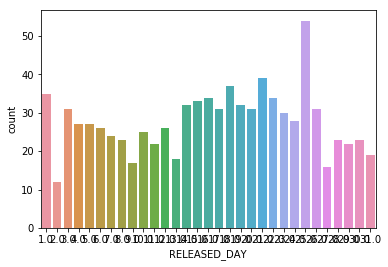

In [43]:
# This shows the spread of what days of the month all of the movies were released at their
# premieres. There appear to be distinct peaks and valleys that correlate.
barChart = sns.countplot(x='RELEASED_DAY', data=df)

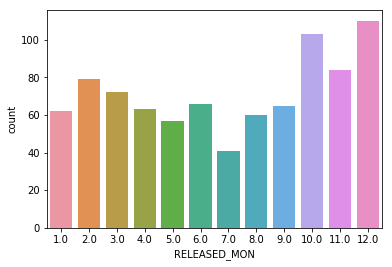

In [44]:
# There also appear to be peaks and valleys defined correlating to which month each of the
# movies were released at their premieres.
barChart = sns.countplot(x='RELEASED_MON', data=df)

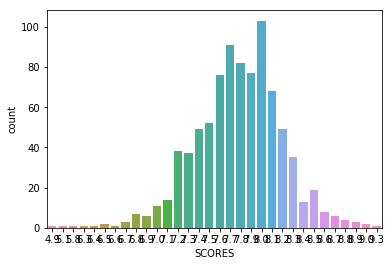

In [45]:
# Here you can see the distribution of all of the movies' scores via IMdB's user rating.
barChart = sns.countplot(x='SCORES', data=df)

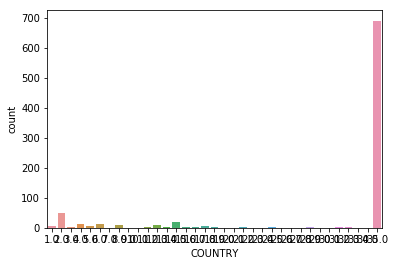

In [46]:
# The United States absolutely  d o m i n a t e s  the film industry in number of releases and
# Academy Award winning quality content alike.
barChart = sns.countplot(x='COUNTRY', data=df)

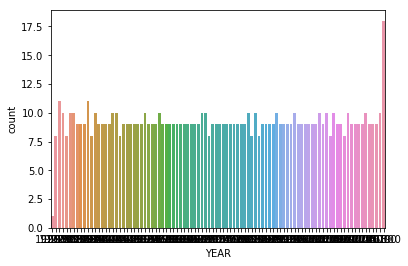

In [47]:
# Here you can see the even distribution/spread of movies in my dataset between 1926 and 2019.
barChart = sns.countplot(x='YEAR', data=df)

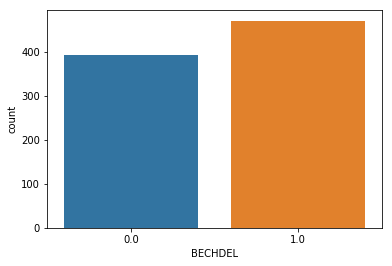

In [48]:
# This barchart compares all entries in my dataset for their Bechdel Test validation. More
# films pass the Bechdel Test than do not (Orange bar is 'passing').
barChart = sns.countplot(x='BECHDEL', data=df)

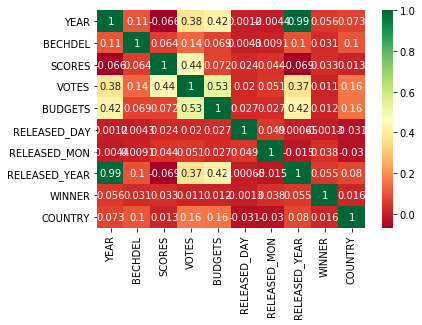

In [49]:
# All features are put to a correlation heatmap.
heatMap = sns.heatmap(df[['YEAR', 'BECHDEL', 'SCORES', 'VOTES', 'BUDGETS', 'RELEASED_DAY', 'RELEASED_MON', 'RELEASED_YEAR', 'WINNER', 'COUNTRY']].corr(),cmap='RdYlGn',annot=True)

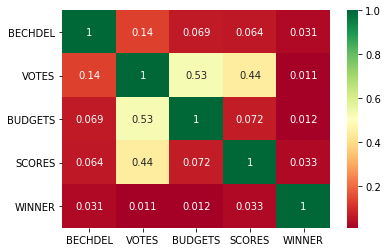

In [50]:
# This is a selection of features that interests me most in the way of correlation.
heatMap = sns.heatmap(df[['BECHDEL', 'VOTES', 'BUDGETS', 'SCORES', 'WINNER']].corr(),cmap='RdYlGn',annot=True)

In [ ]:
#TODO:   Throw some more vis in

In [58]:
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #

In [87]:
X = alternate_df[alternate_df.columns.difference(['WINNER'])]
y = df['WINNER']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.23, 
                                                    train_size=0.77, 
                                                    random_state=42069, 
                                                    shuffle=True)#, stratify=y)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [92]:
print(y_train)

50     0.0
503    0.0
110    0.0
529    0.0
200    0.0
585    0.0
307    0.0
399    0.0
382    0.0
855    0.0
104    0.0
473    0.0
782    0.0
328    0.0
522    0.0
680    0.0
817    0.0
778    0.0
173    0.0
304    0.0
343    0.0
835    0.0
460    0.0
629    0.0
860    0.0
533    0.0
400    0.0
337    0.0
319    0.0
189    0.0
      ... 
548    0.0
15     0.0
765    0.0
403    0.0
625    0.0
146    0.0
451    0.0
364    0.0
474    0.0
638    0.0
501    0.0
392    0.0
263    0.0
586    0.0
670    0.0
310    0.0
5      0.0
387    0.0
72     0.0
155    0.0
822    0.0
224    0.0
357    0.0
527    0.0
735    0.0
846    0.0
710    0.0
752    0.0
185    0.0
361    0.0
Name: WINNER, Length: 663, dtype: float64


In [96]:
df[df['WINNER'] == 1]

,TCONST,TITLE,YEAR,BECHDEL,SCORES,VOTES,BUDGETS,RELEASED_DAY,RELEASED_MON,RELEASED_YEAR,WINNER,COUNTRY
834,tt6966692,green book,2018.0,1.0,8.2,226046.0,23000000.0,16.0,11.0,2018.0,1.0,35.0
